In [1]:
import tensorflow as tf
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [2]:
# Codigo do video:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 64: Quantidade de filtros, 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='softmax')
])

C:\Users\migue\AppData\Local\Temp\ipykernel_1900\1539227467.py:2: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  i = misc.ascent()


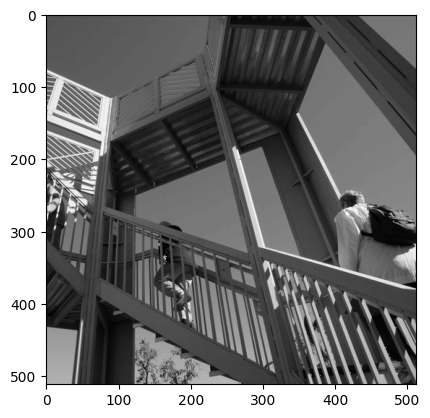

In [3]:
# Codigo do colab: https://developers.google.com/codelabs/tensorflow-3-convolutions?hl=pt-br#0
i = misc.ascent()
plt.grid(False)
plt.gray()
plt.imshow(i)
plt.show()

In [13]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
print(size_x, size_y)

512 512


In [37]:
# filter = [[-1, -2, -1],
          # [0, 0, 0],
          # [1, 2, 1]]

# filtre = [[1, 2, 1],
#           [0, 0, 0],
#           [-2, -1, -2]]
filter = [[-1, 0, 2],
          [-2, 0, 2],
          [-2, 0, 1]]
weight = 1

In [38]:
# Multiplicando os pixels

for x in range(1,size_x-1):
  for y in range(1,size_y-1):
    output_pixel = 0.0
    output_pixel = output_pixel + (i[x-1, y-1] * filter[0][0])
    output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
    output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
    output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
    output_pixel = output_pixel + (i[x, y] * filter[1][1])
    output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
    output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
    output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
    output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
    output_pixel = output_pixel * weight
    if(output_pixel<0):
      output_pixel=0
    if(output_pixel>255):
      output_pixel=255
    i_transformed[x, y] = output_pixel

# for x in range(size_x-1):
#   for y in range(size_y-1):
#       output_pixel = 0.0
#       output_pixel += (i[x, y] * filter[0][0])
#       output_pixel += (i[x+1, y] * filter[0][1])
#       output_pixel += (i[x+2, y] * filter[0][2])
#       output_pixel += (i[x, y+1] * filter[1][0])
#       output_pixel += (i[x+1, y+1] * filter[1][1])
#       output_pixel += (i[x+2, y+1] * filter[1][2])
#       output_pixel += (i[x, y+2] * filter[2][0])
#       output_pixel += (i[x+1, y+2] * filter[2][1])
#       output_pixel += (i[x+2, y+2] * filter[2][2])
#       output_pixel += weight

#       if(output_pixel < 0):
#         output_pixel = 0
#       if(output_pixel > 255):
#         output_pixel = 255

#       i_transformed[x, y] = output_pixel


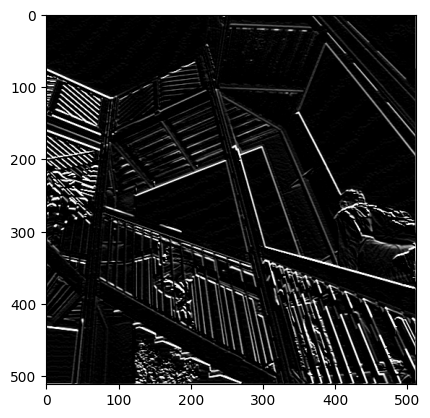

In [39]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

In [40]:
new_x, new_y = size_x // 2, size_y // 2
new_image = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixel = []
        pixel.append(i_transformed[x, y])
        pixel.append(i_transformed[x+1, y])
        pixel.append(i_transformed[x, y+1])
        pixel.append(i_transformed[x+1, y+1])
        pixel.sort(reverse=True)
        new_image[x//2, y//2] = pixel[0]

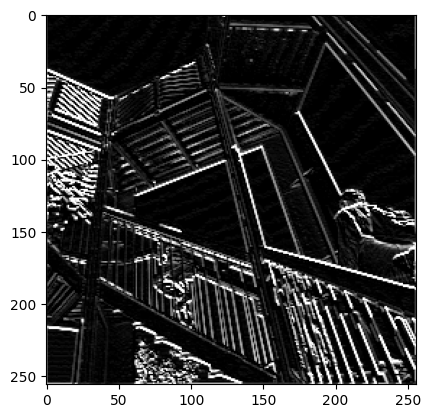

In [41]:
plt.gray()
plt.grid(False)
plt.imshow(new_image)
plt.show()